## Read the submit file

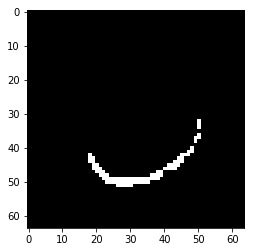

In [4]:
import gzip
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

base_dir = 'D:/DeepLearn/output'
file_path = os.path.join(base_dir, 'submit01222019_epoch100.csv.gz')

with gzip.open(file_path) as f:
    features_train = pd.read_csv(f)

features_example = features_train['rle_mask'][0]

def rle_decode(mask_rle, shape):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)


# Show an example
mask = rle_decode(features_example, [64,64])
plt.imshow(mask,'gray')
plt.show()

# Decoding all
shape = [64, 64]
out_dir = os.path.join(base_dir, 'PredLabel')
if not os.path.exists(out_dir):
    os.mkdir(out_dir)
    
for i in range(len(features_train)):
    rle_mask = features_train['rle_mask'][i]
    mask = np.zeros(shape)
    
    if not pd.isnull(rle_mask):
        mask = rle_decode(rle_mask, shape)
    
    out_file = os.path.join(out_dir, features_train['img'][i])
    img = Image.fromarray(mask, 'L')
    img.save(out_file)


In [5]:
features_train

,img,rle_mask
0,1.tif,2099 1 2163 1 2227 1 2355 1 2418 2 2482 1 2609...
1,10.tif,1584 1 2991 1 3054 2 3116 2 3178 4 3241 4 3292...
2,104.tif,NaN
3,105.tif,NaN
4,110.tif,1969 1 2033 1
5,126.tif,1579 1 1642 3 1707 2
6,131.tif,2985 1
7,144.tif,1445 3 1508 6 1574 8 1641 7 1707 5 1772 5 1837...
8,151.tif,2519 3 2582 5 2646 6 2710 7 2775 7 2840 6 2906 3
9,152.tif,2191 1 2580 2 2644 4 2709 4 2714 1 2774 9 2839...


In [6]:
import os
import numpy as np
from PIL import Image

shape = [64, 64]
composite_path = 'D:/Data/CNNTrainingCrop64_Added/CompositeLabelTotal'
out_dir = 'D:/DeepLearn/output'

def extract_myocardium(composite_path, fname, shape):
    composite_file = os.path.join(composite_path, fname)
    composite = Image.open(composite_file)
    test_composite = np.array(composite)
    #plt.imshow(test_composite)
    #plt.show()
    test_myo = np.zeros(shape)
    values = np.unique(test_composite)
    if np.max(values) == 4:
        test_myo[test_composite == 2] = 1
        test_myo[test_composite == 4] = 1
    else:
        test_myo[test_composite == 2] = 1
    
    #plt.imshow(test_myo)
    #plt.show()
    return test_myo
    
def overlay_infarct(test_myo, fname, shape, out_dir):
    # Show an example
    img_file = os.path.join('D:/Data/CNNTrainingCrop64_Added/TrainingDataTotal', fname)
    img = np.array(Image.open(img_file))
    features_example = features_train['rle_mask'][num]
    mask = np.zeros(shape)
    if not pd.isnull(features_example):
        mask = rle_decode(features_example, shape)
        
    in_dir = os.path.abspath(os.path.join(base_dir, '..', 'input', 'TestingLabel'))
    test_mask = Image.open(os.path.join(in_dir, fname))
    test_mask = np.array(test_mask)
    test_mask[test_mask <= 1.5] = 0;
    test_mask[test_mask > 1.5] = 1;

    test_mask = test_mask*2 + test_myo
    mask = mask*2 + test_myo
    test_masked = np.ma.masked_where(test_mask == 0, test_mask)
    masked = np.ma.masked_where(mask == 0, mask)

    plt.figure()
    plt.imshow(img,'gray',interpolation='none')
    plt.imshow(masked,'jet',interpolation='none', alpha=0.4)
    #plt.show()
    out_file = os.path.join(out_dir, 'GoodExamples', 'pred_'+fname)
    plt.savefig(out_file)

    plt.figure()
    plt.imshow(img,'gray',interpolation='none')
    plt.imshow(test_masked,'jet',interpolation='none', alpha=0.4)
    #plt.show()
    out_file = os.path.join(out_dir, 'GoodExamples', 'trut_'+fname)
    plt.savefig(out_file)
    

## Show Examples 120.tif

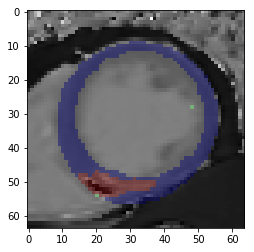

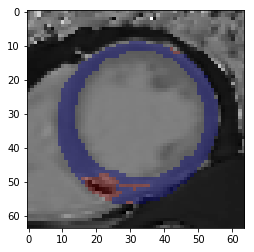

In [15]:
import os
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

num = 4
fname = features_train['img'][num]

test_myo = extract_myocardium(composite_path, fname, shape)
overlay_infarct(test_myo, fname, shape, out_dir)

## Show Examples 23.tif

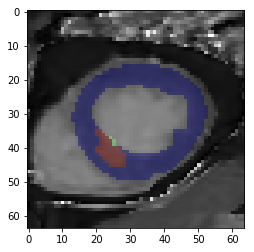

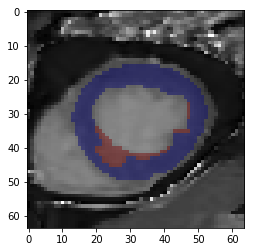

In [16]:
num = 14
fname = features_train['img'][num]

test_myo = extract_myocardium(composite_path, fname, shape)
overlay_infarct(test_myo, fname, shape, out_dir)

## Show Examples 24.tif

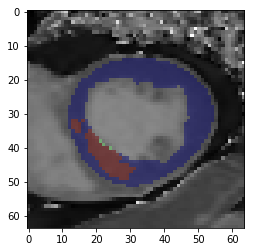

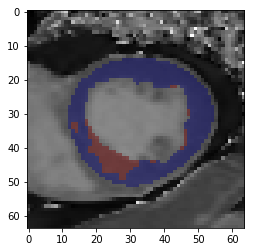

In [17]:
num = 15
fname = features_train['img'][num]

test_myo = extract_myocardium(composite_path, fname, shape)
overlay_infarct(test_myo, fname, shape, out_dir)

## Example of 1.tif

10.tif


FileNotFoundError: [Errno 2] No such file or directory: 'D:/DeepLearn/output\\PredLabel\\GoodExamples\\pred_10.tif'

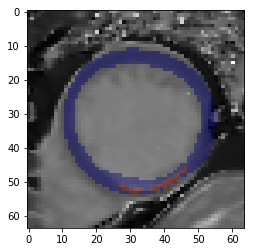

In [12]:
num = 1
fname = features_train['img'][num]
print(fname)

test_myo = extract_myocardium(composite_path, fname, shape)
overlay_infarct(test_myo, fname, shape, out_dir)

In [8]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from glob import glob

def dice(im1, im2):
    """
    Computes the Dice coefficient, a measure of set similarity.
    Parameters
    ----------
    im1 : array-like, bool
        Any array of arbitrary size. If not boolean, will be converted.
    im2 : array-like, bool
        Any other array of identical size. If not boolean, will be converted.
    Returns
    -------
    dice : float
        Dice coefficient as a float on range [0,1].
        Maximum similarity = 1
        No similarity = 0
        
    Notes
    -----
    The order of inputs for `dice` is irrelevant. The result will be
    identical if `im1` and `im2` are switched.
    """
    im1 = np.asarray(im1).astype(np.bool)
    im2 = np.asarray(im2).astype(np.bool)
    smooth = 1.
    if im1.shape != im2.shape:
        raise ValueError("Shape mismatch: im1 and im2 must have the same shape.")

    # Compute Dice coefficient
    intersection = np.logical_and(im1, im2)

    return (2. * intersection.sum() + smooth) / (im1.sum() + im2.sum() + smooth)

#base_dir = 'C:/Users/ZhangX1/Documents/Python_Scripts/DeepLearn/output'
base_dir = 'D:/DeepLearn/output'
out_dir = os.path.join(base_dir, 'PredLabel')
in_dir = os.path.abspath(os.path.join(base_dir, '..', 'input', 'TestingLabel'))
pred_glob = glob(os.path.join(out_dir, '*'))
test_glob = glob(os.path.join(in_dir, '*'))

probs = list()
for i in range(len(pred_glob)):
    im_pred = Image.open(pred_glob[i])
    im_test = Image.open(test_glob[i])
    
    im_pred = np.array(im_pred)
    im_test = np.array(im_test)
    im_test[im_test <= 1.5] = 0;
    im_test[im_test > 1.5] = 1;
    #print(dice(im_pred, im_test))
    dice_coef = dice(im_pred, im_test)
    if not pd.isnull(dice_coef):
        probs.append(dice_coef)
    else:
        probs.append(1)

print(sorted(probs))
nonz = list(np.nonzero(probs))[0]

nonz_probs = list()
for i in nonz:
    nonz_probs.append(probs[i])
print(np.mean(probs))
np.mean(nonz_probs)

[0.008620689655172414, 0.008849557522123894, 0.009174311926605505, 0.010101010101010102, 0.011627906976744186, 0.012345679012345678, 0.01282051282051282, 0.012987012987012988, 0.016129032258064516, 0.017543859649122806, 0.018867924528301886, 0.019230769230769232, 0.02127659574468085, 0.022727272727272728, 0.023809523809523808, 0.02631578947368421, 0.028, 0.030303030303030304, 0.030303030303030304, 0.03333333333333333, 0.037037037037037035, 0.03867403314917127, 0.039473684210526314, 0.04, 0.041666666666666664, 0.04201680672268908, 0.043478260869565216, 0.045454545454545456, 0.05263157894736842, 0.05555555555555555, 0.058823529411764705, 0.0625, 0.0625, 0.06666666666666667, 0.08064516129032258, 0.08333333333333333, 0.09090909090909091, 0.09090909090909091, 0.1, 0.1, 0.1111111111111111, 0.12222222222222222, 0.125, 0.125, 0.125, 0.14285714285714285, 0.14285714285714285, 0.14285714285714285, 0.16428571428571428, 0.16666666666666666, 0.1875, 0.19402985074626866, 0.2, 0.2, 0.2, 0.209090909090

0.27687149214020856

In [15]:
features_train

,img,rle_mask
0,1.tif,1452 2 1517 2 2160 2 2224 2 2480 2 2544 2 2608...
1,105.tif,NaN
2,116.tif,1777 1 1841 2 1905 2 1970 1 2929 1 3021 1 3085...
3,117.tif,3020 1 3084 3 3149 3 3213 4 3235 1 3277 5 3292...
4,120.tif,1841 1 3029 1 3088 3 3092 5 3152 12 3168 1 321...
5,14.tif,1386 2 1451 3 1516 2 1711 1 1775 1 2155 1 2597 2
6,15.tif,1712 1 1776 2 1839 3 1902 4 1966 3 2029 3 2093...
7,154.tif,991 4 1051 10 1062 2 1111 19 1174 22 1238 23 1...
8,155.tif,1495 2 1558 3 1621 4 1684 3 1748 2 1812 1
9,158.tif,1322 2 1387 2 1490 2 1553 2 1616 3 1680 3 1744...


## Load the model

In [7]:
import torch
from glob import glob
import os

base_dir = 'C:/Users/ZhangX1/Documents/Python_Scripts/DeepLearn/output'
file_path = glob(os.path.join(base_dir, 'models/*'))
model_file = file_path[-1]

model = torch.load(model_file)



In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

BN_EPS = 1e-4


class ConvBnRelu2d(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, padding=1, dilation=1, stride=1, groups=1, is_bn=True,
                 is_relu=True):
        super(ConvBnRelu2d, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, padding=padding, stride=stride,
                              dilation=dilation, groups=groups, bias=False)
        self.bn = nn.BatchNorm2d(out_channels, eps=BN_EPS)
        self.relu = nn.ReLU(inplace=True)
        if is_bn is False: self.bn = None
        if is_relu is False: self.relu = None

    def forward(self, x):
        x = self.conv(x)
        if self.bn is not None:
            x = self.bn(x)
        if self.relu is not None:
            x = self.relu(x)
        return x


## original 3x3 stack filters used in UNet
class StackEncoder(nn.Module):
    def __init__(self, x_channels, y_channels, kernel_size=3):
        super(StackEncoder, self).__init__()
        padding = (kernel_size - 1) // 2
        self.encode = nn.Sequential(
            ConvBnRelu2d(x_channels, y_channels, kernel_size=kernel_size, padding=padding, dilation=1, stride=1,
                         groups=1),
            ConvBnRelu2d(y_channels, y_channels, kernel_size=kernel_size, padding=padding, dilation=1, stride=1,
                         groups=1),
        )

    def forward(self, x):
        y = self.encode(x)
        y_small = F.max_pool2d(y, kernel_size=2, stride=2)
        return y, y_small


class StackDecoder(nn.Module):
    def __init__(self, x_big_channels, x_channels, y_channels, kernel_size=3):
        super(StackDecoder, self).__init__()
        padding = (kernel_size - 1) // 2

        self.decode = nn.Sequential(
            ConvBnRelu2d(x_big_channels + x_channels, y_channels, kernel_size=kernel_size, padding=padding,
                         dilation=1, stride=1, groups=1),
            ConvBnRelu2d(y_channels, y_channels, kernel_size=kernel_size, padding=padding, dilation=1, stride=1,
                         groups=1),
            ConvBnRelu2d(y_channels, y_channels, kernel_size=kernel_size, padding=padding, dilation=1, stride=1,
                         groups=1),
        )

    def forward(self, x_big, x):
        N, C, H, W = x_big.size()
        y = F.upsample(x, size=(H, W), mode='bilinear')
        y = torch.cat([y, x_big], 1)
        y = self.decode(y)
        return y


# 1024x1024
class UNet1024(nn.Module):
    def __init__(self, in_shape):
        super(UNet1024, self).__init__()
        C, H, W = in_shape
        # assert(C==1)

        # 1024
        self.down1 = StackEncoder(C, 24, kernel_size=3)  # 512
        self.down2 = StackEncoder(24, 64, kernel_size=3)  # 256
        self.down3 = StackEncoder(64, 128, kernel_size=3)  # 128
        self.down4 = StackEncoder(128, 256, kernel_size=3)  # 64
        self.down5 = StackEncoder(256, 512, kernel_size=3)  # 32
        self.down6 = StackEncoder(512, 768, kernel_size=3)  # 16

        self.center = nn.Sequential(
            ConvBnRelu2d(768, 768, kernel_size=3, padding=1, stride=1),
        )

        # 8
        # x_big_channels, x_channels, y_channels
        self.up6 = StackDecoder(768, 768, 512, kernel_size=3)  # 16
        self.up5 = StackDecoder(512, 512, 256, kernel_size=3)  # 32
        self.up4 = StackDecoder(256, 256, 128, kernel_size=3)  # 64
        self.up3 = StackDecoder(128, 128, 64, kernel_size=3)  # 128
        self.up2 = StackDecoder(64, 64, 24, kernel_size=3)  # 256
        self.up1 = StackDecoder(24, 24, 24, kernel_size=3)  # 512
        self.classify = nn.Conv2d(24, 1, kernel_size=1, padding=0, stride=1, bias=True)

    def _crop_concat(self, upsampled, bypass):
        """
         Crop y to the (h, w) of x and concat them.
         Used for the expansive path.
        Returns:
            The concatenated tensor
        """
        c = (bypass.size()[2] - upsampled.size()[2]) // 2
        bypass = F.pad(bypass, (-c, -c, -c, -c))

        return torch.cat((upsampled, bypass), 1)

    def forward(self, x):
        out = x  # ;print('x    ',x.size())
        #
        down1, out = self.down1(out)  ##;print('down1',down1.size())  #256
        down2, out = self.down2(out)  # ;print('down2',down2.size())  #128
        down3, out = self.down3(out)  # ;print('down3',down3.size())  #64
        down4, out = self.down4(out)  # ;print('down4',down4.size())  #32
        down5, out = self.down5(out)  # ;print('down5',down5.size())  #16
        down6, out = self.down6(out)  # ;print('down6',down6.size())  #8
        pass  # ;print('out  ',out.size())

        out = self.center(out)
        out = self.up6(down6, out)
        out = self.up5(down5, out)
        out = self.up4(down4, out)
        out = self.up3(down3, out)
        out = self.up2(down2, out)
        out = self.up1(down1, out)
        # 1024

        out = self.classify(out)
        out = torch.squeeze(out, dim=1)
        return out


# 128x128
class UNet128(nn.Module):
    def __init__(self, in_shape):
        super(UNet128, self).__init__()
        C, H, W = in_shape
        # assert(C==3)

        # 128
        self.down3 = StackEncoder(C, 128, kernel_size=3)  # 64
        self.down4 = StackEncoder(128, 256, kernel_size=3)  # 32
        self.down5 = StackEncoder(256, 512, kernel_size=3)  # 16
        self.down6 = StackEncoder(512, 1024, kernel_size=3)  # 8

        self.center = nn.Sequential(
            ConvBnRelu2d(1024, 1024, kernel_size=3, padding=1, stride=1),
        )

        # 8
        # x_big_channels, x_channels, y_channels
        self.up6 = StackDecoder(1024, 1024, 512, kernel_size=3)  # 16
        self.up5 = StackDecoder(512, 512, 256, kernel_size=3)  # 32
        self.up4 = StackDecoder(256, 256, 128, kernel_size=3)  # 64
        self.up3 = StackDecoder(128, 128, 64, kernel_size=3)  # 128
        self.classify = nn.Conv2d(64, 1, kernel_size=1, padding=0, stride=1, bias=True)

    def forward(self, x):
        out = x  # ;print('x    ',x.size())
        down3, out = self.down3(out)  # ;print('down3',down3.size())  #64
        down4, out = self.down4(out)  # ;print('down4',down4.size())  #32
        down5, out = self.down5(out)  # ;print('down5',down5.size())  #16
        down6, out = self.down6(out)  # ;print('down6',down6.size())  #8
        pass  # ;print('out  ',out.size())

        out = self.center(out)
        out = self.up6(down6, out)
        out = self.up5(down5, out)
        out = self.up4(down4, out)
        out = self.up3(down3, out)
        out = self.classify(out)
        out = torch.squeeze(out, dim=1)
        return out


In [23]:
import torch
from glob import glob
import os
import numpy as np
from PIL import Image

#base_dir = 'C:/Users/ZhangX1/Documents/Python_Scripts/DeepLearn/output'
base_dir = 'D:/DeepLearn/output'
file_path = glob(os.path.join(base_dir, 'models/*'))
model_file = file_path[0]

model = UNet1024((1, 64, 64))
model_dict = torch.load(model_file)
model.load_state_dict(model_dict)

input_file ='D:/DeepLearn/input/TestingData/11.tif'
#input_file = 'C:/Users/ZhangX1/Documents/Python_Scripts/DeepLearn/input/LabelDataTotal/20.tif'
img = np.array(Image.open(input_file))
#example = np.unique(img)


# make example a torch tensor
value = torch.from_numpy(img)

# then put it on the GPU, make it float and insert a fake batch dimension
test_value = torch.autograd.Variable(value.cuda())
test_value = test_value.float()
test_value = test_value.unsqueeze(0)

# pass it through the model
prediction = model(test_value)

# get the result out and reshape it
cpu_pred = prediction.cpu()
result = cpu_pred.data.numpy()
array_res = np.reshape(result, (64,64))

RuntimeError: Expected 4-dimensional input for 4-dimensional weight [24, 1, 3, 3], but got input of size [1, 64, 64] instead

In [22]:
img.shape

(64, 64)

In [26]:
model_dict

OrderedDict([('down1.encode.0.conv.weight',
              tensor([[[[-0.1511,  0.0531,  0.4561],
                        [ 0.0741,  0.0765,  0.2674],
                        [-0.1700,  0.1785, -0.0035]]],
              
              
                      [[[ 0.2454,  0.3261,  0.0003],
                        [ 0.1341,  0.3487,  0.3485],
                        [ 0.0495,  0.2849, -0.1619]]],
              
              
                      [[[-0.0949, -0.3506,  0.0175],
                        [ 0.0863,  0.2782,  0.3297],
                        [-0.1513,  0.0352, -0.0573]]],
              
              
                      [[[-0.2091,  0.2116,  0.3366],
                        [-0.0519, -0.2731, -0.2127],
                        [ 0.1262,  0.2816, -0.2639]]],
              
              
                      [[[ 0.1232, -0.0343, -0.1458],
                        [-0.3797,  0.0678,  0.0147],
                        [-0.3237,  0.2694,  0.2271]]],
              
              
 

In [25]:
test_value

tensor([[[106.,  82.,  78.,  ...,  86., 119.,  96.],
         [120.,  94.,  88.,  ..., 103., 101.,  90.],
         [ 71.,  58.,  36.,  ..., 106.,  84.,  77.],
         ...,
         [125., 123., 116.,  ..., 239., 233., 226.],
         [127., 124., 118.,  ..., 236., 232., 230.],
         [122., 122., 119.,  ..., 234., 229., 222.]]], device='cuda:0')

In [16]:
model.keys()

odict_keys(['down1.encode.0.conv.weight', 'down1.encode.0.bn.weight', 'down1.encode.0.bn.bias', 'down1.encode.0.bn.running_mean', 'down1.encode.0.bn.running_var', 'down1.encode.0.bn.num_batches_tracked', 'down1.encode.1.conv.weight', 'down1.encode.1.bn.weight', 'down1.encode.1.bn.bias', 'down1.encode.1.bn.running_mean', 'down1.encode.1.bn.running_var', 'down1.encode.1.bn.num_batches_tracked', 'down2.encode.0.conv.weight', 'down2.encode.0.bn.weight', 'down2.encode.0.bn.bias', 'down2.encode.0.bn.running_mean', 'down2.encode.0.bn.running_var', 'down2.encode.0.bn.num_batches_tracked', 'down2.encode.1.conv.weight', 'down2.encode.1.bn.weight', 'down2.encode.1.bn.bias', 'down2.encode.1.bn.running_mean', 'down2.encode.1.bn.running_var', 'down2.encode.1.bn.num_batches_tracked', 'down3.encode.0.conv.weight', 'down3.encode.0.bn.weight', 'down3.encode.0.bn.bias', 'down3.encode.0.bn.running_mean', 'down3.encode.0.bn.running_var', 'down3.encode.0.bn.num_batches_tracked', 'down3.encode.1.conv.weight'

In [17]:
model

OrderedDict([('down1.encode.0.conv.weight',
              tensor([[[[-0.1511,  0.0531,  0.4561],
                        [ 0.0741,  0.0765,  0.2674],
                        [-0.1700,  0.1785, -0.0035]]],
              
              
                      [[[ 0.2454,  0.3261,  0.0003],
                        [ 0.1341,  0.3487,  0.3485],
                        [ 0.0495,  0.2849, -0.1619]]],
              
              
                      [[[-0.0949, -0.3506,  0.0175],
                        [ 0.0863,  0.2782,  0.3297],
                        [-0.1513,  0.0352, -0.0573]]],
              
              
                      [[[-0.2091,  0.2116,  0.3366],
                        [-0.0519, -0.2731, -0.2127],
                        [ 0.1262,  0.2816, -0.2639]]],
              
              
                      [[[ 0.1232, -0.0343, -0.1458],
                        [-0.3797,  0.0678,  0.0147],
                        [-0.3237,  0.2694,  0.2271]]],
              
              
 